In [1]:
import cv2
import numpy as np
import os
import sys
sys.path.append('../../src')
import DISData as DD
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
doUT = DD.SQL()

host:  192.168.0.128
user:  diadmin
password:  ········


SQL connection done


In [4]:
data_name = 'celebA_spoof'

In [45]:
query = f'''select label, count(img_dir) as count from DeepInSight.{data_name}_info group by label;'''

In [34]:
db = doUT.db
conn = doUT.conn
conn.execute(query)
column_names = [desc[0] for desc in conn.description]
result = conn.fetchall()
db.commit()

In [35]:
df = pd.DataFrame(result, columns=column_names)
df['count'] = df['count'].astype('int64')

In [36]:
df = df.sort_values(by='label')
df

,label,count
0,live,184407
1,spoof,377128


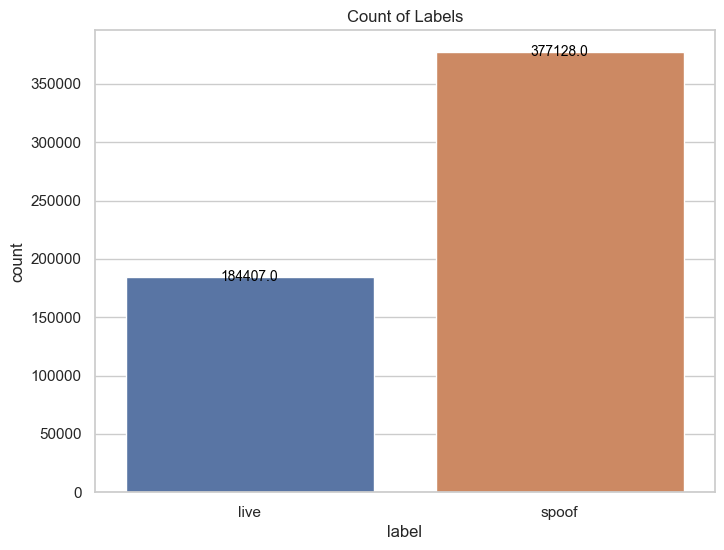

In [43]:
try:
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    ax = sns.barplot(x='label', y='count', data=df, hue='label')
    for p in ax.patches:
        label = p.get_height()  # 막대의 너비를 가져와서 count로 사용
        count = p.get_x() + p.get_width() / 2  # 막대의 y 좌표를 가져와서 label로 사용
        ax.annotate(f'{label}', (count, label), ha='center', va='center', fontsize=10, color='black')
    plt.xlabel('label')
    plt.ylabel('count')
    plt.title('Count of Labels')
    save_path = f'label/{data_name}_label.png'
    if not os.path.exists('label'):
        os.makedirs('label')
    if os.path.exists(save_path):
        os.remove(save_path)
    plt.savefig(save_path)
except Exception as e:
    print(e)

In [46]:
query2 = f'''select label_id, count(img_dir) as count from DeepInSight.{data_name}_info group by label_id;'''

In [52]:
db = doUT.db
conn = doUT.conn
conn.execute(query2)
column_names = [desc[0] for desc in conn.description]
result2 = conn.fetchall()
db.commit()

In [60]:
df2

,label_id,count
0,1,70
1,2,51
2,3,67
3,4,64
4,5,66
...,...,...
9188,10173,110
9189,10174,110
9190,10175,70
9191,10176,108


In [61]:
df2 = pd.DataFrame(result2, columns=column_names)
df2['count'] = df2['count'].astype('int64')
df2['label_id'] = df2['label_id'].astype('str')

In [63]:
df2 = df2.sort_values(by='count')
df2

,label_id,count
7580,8565,1
1573,1965,1
7600,8585,1
1814,2277,2
7338,8323,2
...,...,...
4560,5545,516
4493,5478,529
4639,5624,558
5260,6245,575


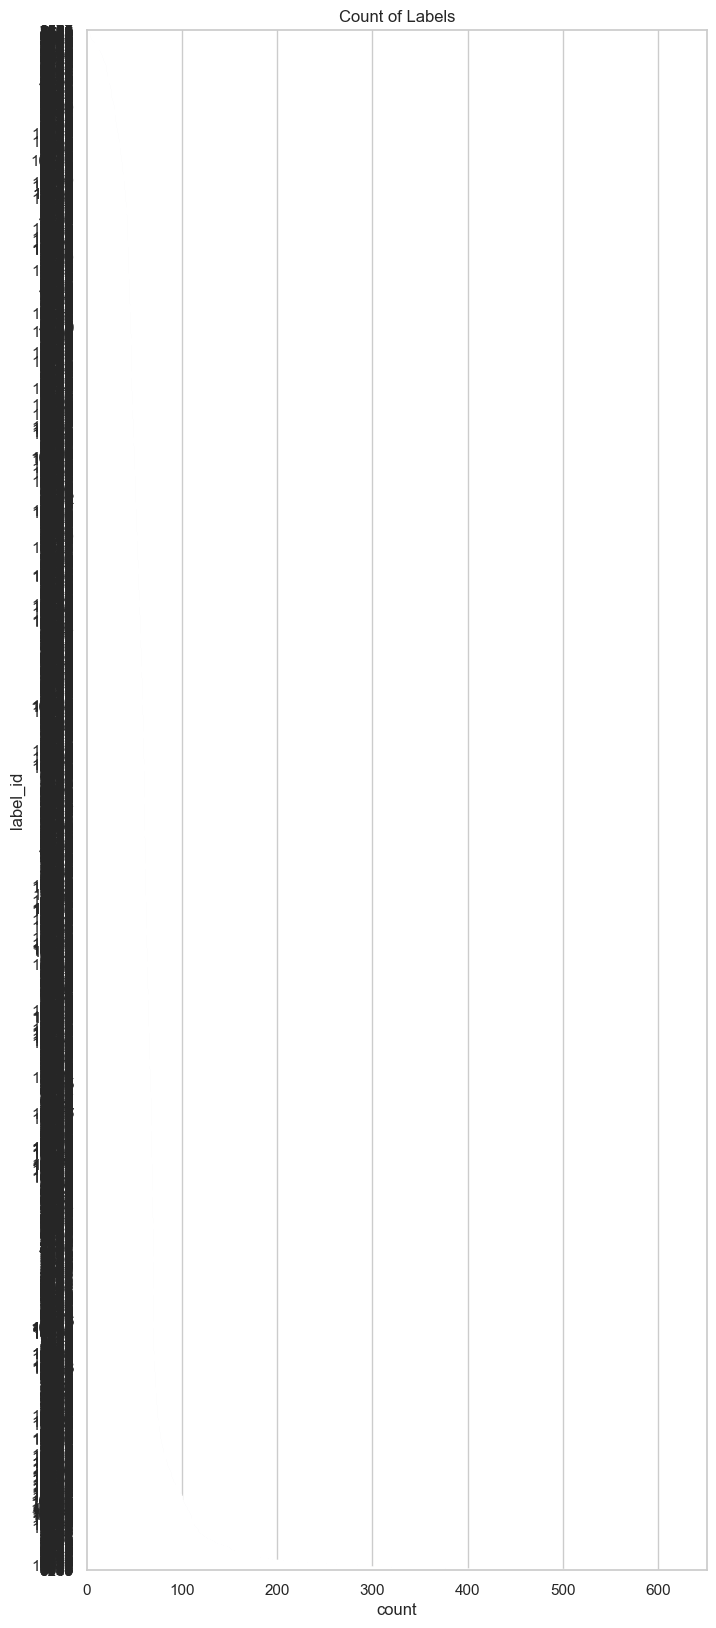

In [69]:
try:
    plt.figure(figsize=(8, 20))
    sns.set(style="whitegrid")
    ax = sns.barplot(x='count', y='label_id', data=df2)
    # for p in ax.patches:
    #     count = p.get_width()  # 막대의 너비를 가져와서 count로 사용
    #     label_id = p.get_y() + p.get_height() / 2  # 막대의 y 좌표를 가져와서 label로 사용
    #     ax.annotate(f'{count}', (count, label), ha='center', va='center', fontsize=10, color='black')
    plt.xlabel('count')
    plt.ylabel('label_id')
    plt.title('Count of Labels')
    save_path = f'label/{data_name}_label2.png'
    if not os.path.exists('label'):
        os.makedirs('label')
    if os.path.exists(save_path):
        os.remove(save_path)
    plt.savefig(save_path)
except Exception as e:
    print(e)